# <b><span style='color:#F1A424'>AutoML - Binary Classification - Breast Cancer Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Breast Cancer Dataset**

**Features**:

- `ID number`
-  `Diagnosis` : (M = malignant, B = benign)

- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none


**Target Variable**:

- `diagnosis`: 357 benign, 212 malignant

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of cancer i.e., benign and malignant.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.



In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','breast_cancer')

In [5]:
# Fetching in teradata dataframe
cancer_df = DataFrame("breast_cancer")

In [6]:
# first 5 rows
cancer_df.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [7]:
# cancer_df dataset
cancer_df.shape

(569, 32)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
cancer_df_sample = cancer_df.sample(frac = [0.8, 0.2])

In [9]:
cancer_df_sample.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,sampleid
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472,1
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179,1
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368,1
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376,1
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486,2
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082,1
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789,1
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834,2
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,1


In [10]:
# Fetching train and test data
cancer_df_train= cancer_df_sample[cancer_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cancer_df_test = cancer_df_sample[cancer_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
cancer_df_train.shape

(455, 32)

In [12]:
# test data shape
cancer_df_test.shape

(114, 32)

In [13]:
#train dataset
cancer_df_train.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
86517,M,18.66,17.12,121.4,1077.0,0.1054,0.11,0.1457,0.08665,0.1966,0.06213,0.7128,1.581,4.895,90.47,0.008102,0.02101,0.03342,0.01601,0.02045,0.00457,22.25,24.9,145.4,1549.0,0.1503,0.2291,0.3272,0.1674,0.2894,0.08456
86561,B,13.85,17.21,88.44,588.7,0.08785,0.06136,0.0142,0.01141,0.1614,0.0589,0.2185,0.8561,1.495,17.91,0.004599,0.009169,0.009127,0.004814,0.01247,0.001708,15.49,23.58,100.3,725.9,0.1157,0.135,0.08115,0.05104,0.2364,0.07182
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [14]:
# test dataset
cancer_df_test.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
848406,M,14.68,20.13,94.74,684.5,0.09867,0.072,0.07395,0.05259,0.1586,0.05922,0.4727,1.24,3.195,45.4,0.005718,0.01162,0.01998,0.01109,0.0141,0.002085,19.07,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216
853201,M,17.57,15.05,115.0,955.1,0.09847,0.1157,0.09875,0.07953,0.1739,0.06149,0.6003,0.8225,4.655,61.1,0.005627,0.03033,0.03407,0.01354,0.01925,0.003742,20.01,19.52,134.9,1227.0,0.1255,0.2812,0.2489,0.1456,0.2756,0.07919
853612,M,11.84,18.7,77.93,440.6,0.1109,0.1516,0.1218,0.05182,0.2301,0.07799,0.4825,1.03,3.475,41.0,0.005551,0.03414,0.04205,0.01044,0.02273,0.005667,16.82,28.12,119.4,888.7,0.1637,0.5775,0.6956,0.1546,0.4761,0.1402
857155,B,12.05,14.63,78.04,449.3,0.1031,0.09092,0.06592,0.02749,0.1675,0.06043,0.2636,0.7294,1.848,19.87,0.005488,0.01427,0.02322,0.00566,0.01428,0.002422,13.76,20.7,89.88,582.6,0.1494,0.2156,0.305,0.06548,0.2747,0.08301
859283,M,14.78,23.94,97.4,668.3,0.1172,0.1479,0.1267,0.09029,0.1953,0.06654,0.3577,1.281,2.45,35.24,0.006703,0.0231,0.02315,0.01184,0.019,0.003224,17.31,33.39,114.6,925.1,0.1648,0.3416,0.3024,0.1614,0.3321,0.08911
861598,B,14.64,15.24,95.77,651.9,0.1132,0.1339,0.09966,0.07064,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.04412,0.04436,0.01623,0.02427,0.004841,16.34,18.24,109.4,803.6,0.1277,0.3089,0.2604,0.1397,0.3151,0.08473
857438,M,15.1,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.0103,0.01603,0.009222,0.01095,0.001629,18.1,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.153,0.2675,0.07873
851509,M,21.16,23.04,137.2,1404.0,0.09428,0.1022,0.1097,0.08632,0.1769,0.05278,0.6917,1.127,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.26,0.3155,0.2009,0.2822,0.07526
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping timer threshold to 400 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(max_runtime_secs=400,
                     max_models=5,
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 455
Total Columns in the data: 32

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
radius_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
diagnosis,VARCHAR(20) CHARACTER SET LATIN,455,0,0,None,None,None,0.0,100.0
radius_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
area_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concavity_se,FLOAT,455,0,None,11,444,0,0.0,100.0
symmetry_se,FLOAT,455,0,None,0,455,0,0.0,100.0
area_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
smoothness_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
texture_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concavity_worst,FLOAT,455,0,None,11,444,0,0.0,100.0



Statistics of Data:


func,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
min,8670,6.981,9.71,43.79,143.5,0.053,0.019,0,0,0.106,0.05,0.112,0.36,0.757,7.228,0.002,0.002,0,0,0.008,0.001,7.93,12.02,50.41,185.2,0.071,0.027,0,0,0.157,0.055
std,126550752.645,3.619,4.188,25.044,362.351,0.014,0.055,0.082,0.04,0.028,0.007,0.287,0.552,2.118,47.702,0.003,0.019,0.028,0.006,0.008,0.003,4.916,6.089,34.444,579.205,0.023,0.163,0.21,0.067,0.061,0.018
25%,866143,11.54,16.19,74.095,408.2,0.086,0.063,0.027,0.02,0.162,0.058,0.231,0.839,1.575,17.64,0.005,0.013,0.015,0.008,0.015,0.002,12.835,20.97,83.375,504.3,0.116,0.141,0.108,0.064,0.251,0.071
50%,904357,13.28,18.82,85.98,541.8,0.096,0.091,0.06,0.033,0.181,0.062,0.324,1.095,2.289,24.28,0.006,0.02,0.025,0.011,0.019,0.003,14.9,25.2,96.74,670.6,0.131,0.212,0.226,0.098,0.285,0.08
75%,8811810.5,16.025,21.69,105.4,795.5,0.105,0.131,0.133,0.072,0.197,0.066,0.495,1.48,3.371,45.4,0.008,0.033,0.041,0.015,0.024,0.004,19.085,29.69,126.8,1122.5,0.147,0.345,0.38,0.162,0.32,0.092
max,911320502,28.11,33.81,188.5,2501,0.163,0.345,0.427,0.201,0.304,0.097,2.873,4.885,21.98,542.2,0.031,0.135,0.304,0.041,0.079,0.023,36.04,49.54,251.2,4254,0.223,1.058,1.252,0.291,0.664,0.208
mean,30528890.591,14.091,19.192,91.772,653.52,0.096,0.105,0.089,0.049,0.182,0.063,0.408,1.216,2.891,40.761,0.007,0.026,0.031,0.012,0.021,0.004,16.219,25.566,106.986,877.845,0.133,0.256,0.27,0.114,0.292,0.084
count,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
diagnosis                 2         

No Futile columns found.

Target Column Distribution:


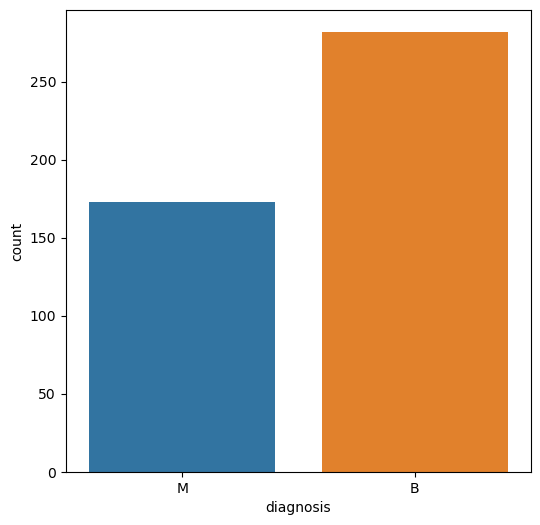

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
               ColumnName  OutlierPercentage
0               area_mean           3.956044
1                 area_se          11.428571
2             symmetry_se           5.274725
3          perimeter_mean           2.197802
4  fractal_dimension_mean           2.857143
5           symmetry_mean           2.417582
6               radius_se           6.153846
7        compactness_mean           3.296703
8              texture_se           3.076923
9          symmetry_worst           3.296703


Analysis completed. No action taken.                                                    


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171989053580947"' - 1/19


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


compactness_worst,texture_se,radius_worst,id,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,fractal_dimension_mean,concavity_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se,diagnosis
0.2236,1.332,19.92,9,0.1861,1233.0,0.05943,0.1216,0.01875,0.2802,0.1137,0.03067,25.27,16.11,0.003434,0.06248,0.09447,0.08158,105.1,0.09721,0.00677,129.0,18.05,0.7049,0.01167,4.533,0.2792,0.1314,74.08,813.0,0.01938,1
0.1486,0.8554,19.8,12,0.2026,1210.0,0.0539,0.1096,0.02294,0.1932,0.07304,0.01946,25.05,17.01,0.002581,0.05223,0.0695,0.06469,109.7,0.08772,0.005038,130.0,20.26,0.5858,0.01123,4.106,0.3275,0.1111,68.46,904.3,0.01503,1
0.2116,1.457,17.73,14,0.1869,975.2,0.07981,0.1047,0.04022,0.3344,0.1283,0.05839,25.21,16.26,0.006187,0.06532,0.1799,0.07953,107.5,0.1165,0.01056,113.7,21.88,0.5706,0.01186,2.961,0.2736,0.1426,57.72,826.8,0.03756,1
0.3441,1.093,10.28,25,0.2378,300.2,0.05252,0.1025,0.02542,0.2099,0.2239,0.03483,16.38,9.268,0.01045,0.09502,0.0973,0.1252,61.49,0.1634,0.009783,69.05,12.87,0.4076,0.02188,3.014,0.3038,0.1902,20.04,248.7,0.04542,0
0.7444,1.666,24.09,10,0.231,1651.0,0.09961,0.2493,0.05333,0.7242,0.219,0.09723,33.17,19.07,0.007646,0.06343,0.2107,0.1038,128.3,0.09081,0.006548,177.4,24.81,0.9811,0.02638,8.83,0.467,0.1247,104.9,1104.0,0.1006,1
0.4002,1.213,23.17,15,0.2085,1748.0,0.08481,0.2134,0.02018,0.4211,0.1571,0.04493,27.65,15.5,0.005815,0.06864,0.1522,0.1048,102.9,0.112,0.008198,157.1,21.08,1.37,0.02139,9.424,0.3003,0.1517,176.5,803.1,0.03889,1
0.2176,0.8423,16.76,20,0.1668,856.9,0.06142,0.1018,0.01055,0.1856,0.1364,0.01996,20.43,15.04,0.003237,0.06869,0.07721,0.08549,98.73,0.09883,0.004123,109.7,16.74,0.372,0.01004,2.304,0.2177,0.1135,34.84,689.4,0.01819,0
0.08862,1.571,13.34,22,0.1739,547.8,0.0177,0.07431,0.01447,0.1145,0.04038,0.01069,32.84,12.18,0.001532,0.05677,0.02383,0.06878,77.22,0.08013,0.00508,84.58,20.52,0.1924,0.006797,1.183,0.2694,0.1123,14.68,458.7,0.006098,0
0.2378,1.044,14.97,13,0.1925,677.9,0.03821,0.1015,0.01782,0.2671,0.1058,0.02701,24.64,12.47,0.003586,0.06373,0.08005,0.0875,81.09,0.09965,0.006953,96.05,18.6,0.3961,0.01037,2.497,0.3014,0.1426,30.29,481.9,0.01911,0
0.05445,0.9899,13.63,34,0.1466,570.7,0.0133,0.0399,0.01065,0.02758,0.03774,0.00618,16.15,12.81,0.003351,0.06133,0.009193,0.07319,81.29,0.08739,0.008534,86.7,13.06,0.2889,0.007408,1.778,0.1783,0.1162,21.79,508.8,0.006364,0


compactness_worst,texture_se,radius_worst,id,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,fractal_dimension_mean,concavity_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se,diagnosis
0.3235,1.186,25.73,36,0.2094,2009.0,0.08691,0.182,0.01897,0.3617,0.1306,0.03446,28.64,19.8,0.004045,0.05581,0.1272,0.08255,129.7,0.09383,0.006804,170.3,21.56,0.9553,0.01712,6.487,0.307,0.1353,124.4,1230.0,0.03169,1
0.3748,1.911,10.06,16,0.233,297.1,0.04908,0.1145,0.03491,0.4609,0.1972,0.1027,23.4,9.042,0.007877,0.08743,0.1975,0.1055,60.07,0.09968,0.009845,68.62,18.9,0.4653,0.02527,3.769,0.3135,0.1221,24.2,244.5,0.0659,0
0.06542,2.542,10.94,124,0.2372,366.3,0.01111,0.02222,0.01717,0.03986,0.04462,0.01993,23.31,10.57,0.004492,0.05768,0.01993,0.06736,66.82,0.08142,0.01072,69.35,18.32,0.1818,0.01111,1.277,0.2699,0.09794,13.12,340.9,0.01331,0
0.1843,1.905,11.86,40,0.2595,437.6,0.05588,0.09314,0.03418,0.1546,0.1181,0.08099,22.33,11.26,0.006517,0.06233,0.09274,0.07009,73.72,0.0802,0.01574,78.27,19.96,0.4866,0.03487,2.877,0.2955,0.1028,34.68,394.1,0.08262,0
0.2567,0.7383,21.58,18,0.1867,1436.0,0.06527,0.1984,0.01144,0.3889,0.08995,0.02048,29.33,17.19,0.001575,0.0558,0.09061,0.0757,111.6,0.09726,0.004493,140.5,22.07,0.4203,0.009875,2.819,0.3216,0.1558,45.42,928.3,0.01206,1
0.2045,1.016,19.77,88,0.1798,1223.0,0.06638,0.152,0.0155,0.2829,0.08424,0.035,24.56,16.07,0.001948,0.05391,0.09769,0.06387,104.1,0.09168,0.01082,128.8,19.65,0.7474,0.01809,5.029,0.265,0.15,79.25,817.7,0.02203,1
0.1239,0.5796,9.507,26,0.1683,274.9,0.007799,0.04419,0.0209,0.1168,0.05272,0.01981,15.4,8.618,0.002788,0.07187,0.02061,0.09026,54.34,0.09752,0.01011,59.9,11.79,0.1559,0.005742,1.046,0.322,0.1733,8.322,224.5,0.01055,0
0.5955,0.78,25.28,135,0.1733,1933.0,0.0974,0.2507,0.01467,0.8489,0.1849,0.068,25.59,19.73,0.007259,0.06697,0.2417,0.1297,130.7,0.1062,0.008482,159.8,19.82,0.7661,0.01971,4.115,0.2749,0.171,92.81,1206.0,0.05057,1
0.1726,1.14,13.45,42,0.1847,562.0,0.01638,0.05356,0.01477,0.1449,0.06232,0.02079,24.49,11.8,0.003071,0.06019,0.02853,0.08121,75.26,0.09087,0.005463,86.0,17.26,0.3438,0.005398,2.225,0.2779,0.1244,25.06,431.9,0.01964,0
0.2793,0.6417,12.45,161,0.1499,473.8,0.02639,0.1056,0.0226,0.269,0.09661,0.04017,17.6,11.74,0.006822,0.06758,0.06726,0.09879,76.31,0.08099,0.006982,81.25,14.69,0.1924,0.01528,1.345,0.2604,0.1073,13.04,426.0,0.03916,0


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0            texture_se           3.076923
1     compactness_worst           2.857143
2      compactness_mean           3.296703
3  fractal_dimension_se           5.714286
4   concave_points_mean           2.197802
5         symmetry_mean           2.417582
6          texture_mean           0.879121
7         texture_worst           0.659341
8             area_mean           3.956044
9               area_se          11.428571


['texture_se', 'concavity_worst', 'symmetry_mean', 'fractal_dimension_se', 'texture_worst', 'concave_points_mean', 'compactness_worst', 'radius_worst', 'concavity_se', 'smoothness_mean', 'area_mean', 'compactness_mean', 'texture_mean', 'area_worst', 'radius_mean', 'perimeter_worst', 'fractal_dimension_mean', 'smoothness_worst', 'symmetry_se', 'fractal_dimension_worst', 'compactness_se', 'concavity_mean', 'perimeter_mean', 'radius_se', 'smoothness_se', 'concave_points_se', 'perimeter_se', 'symmetry_worst']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171992565240299"'% - 7/19


compactness_worst,texture_se,radius_worst,id,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,fractal_dimension_mean,concavity_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se,diagnosis
0.08971,0.7815,11.99,107,0.183,440.8,0.01786,0.05506,0.02388,0.07116,0.05113,0.01196,16.3,11.15,0.001619,0.06105,0.01982,0.06772,70.87,0.09754,0.009019,76.25,13.08,0.2251,0.008232,1.429,0.2859,0.1341,15.48,381.9,0.008985,0
0.1256,0.8092,12.12,65,0.169,453.5,0.01471,0.03922,0.03102,0.1201,0.06064,0.04505,15.82,11.14,0.004831,0.06083,0.04505,0.07018,71.24,0.07274,0.005541,79.62,14.07,0.4222,0.01471,3.33,0.2576,0.08864,28.84,384.6,0.03387,0
0.1866,0.7339,24.99,241,0.1812,1956.0,0.07017,0.186,0.01389,0.2416,0.07864,0.0186,23.41,20.57,0.003532,0.05667,0.0869,0.08902,132.9,0.08474,0.005225,158.8,17.77,0.5435,0.0134,3.398,0.275,0.1238,74.08,1326.0,0.01308,1
0.09052,1.532,13.35,395,0.1539,544.3,0.008535,0.03983,0.01939,0.03619,0.04202,0.007004,28.46,12.3,0.002222,0.05945,0.007756,0.07207,77.88,0.08313,0.007881,84.53,19.02,0.184,0.006522,1.199,0.2554,0.1222,13.24,464.4,0.008432,0
0.2291,1.581,22.25,72,0.1966,1549.0,0.08665,0.1674,0.02045,0.3272,0.11,0.03342,24.9,18.66,0.00457,0.06213,0.1457,0.08456,121.4,0.1054,0.008102,145.4,17.12,0.7128,0.01601,4.895,0.2894,0.1503,90.47,1077.0,0.02101,1
0.1963,0.8944,13.29,30,0.1602,544.1,0.01921,0.08442,0.01251,0.1937,0.06815,0.01167,27.49,12.36,0.001356,0.06066,0.02643,0.07185,79.01,0.08477,0.003457,85.56,18.54,0.1199,0.005558,0.8484,0.2983,0.1184,9.227,466.7,0.01047,0
0.1676,2.174,13.11,349,0.1842,525.1,0.02233,0.06127,0.01816,0.1755,0.09362,0.02586,32.16,11.45,0.003976,0.07005,0.04591,0.08851,73.81,0.1102,0.01037,84.53,20.97,0.3251,0.007506,2.077,0.2762,0.1557,24.62,401.5,0.01706,0
0.07057,0.7873,9.262,364,0.1722,259.2,0.0,0.0,0.02711,0.0,0.04276,0.0,17.04,8.671,0.003399,0.06724,0.0,0.07848,54.42,0.09138,0.009172,58.36,14.45,0.2204,0.0,1.435,0.2592,0.1162,11.36,227.2,0.008007,0
0.1008,1.363,15.11,118,0.1424,694.4,0.02088,0.05556,0.01544,0.05285,0.05492,0.005254,25.58,13.87,0.002087,0.05883,0.01502,0.07113,88.52,0.08743,0.005638,96.74,16.21,0.2543,0.006042,1.737,0.2362,0.1153,20.74,593.7,0.007939,0
0.2515,1.197,11.88,323,0.1922,424.8,0.02642,0.07926,0.03504,0.1916,0.1147,0.03354,22.94,10.6,0.003318,0.06491,0.06387,0.07587,69.28,0.09688,0.00747,78.28,18.95,0.4505,0.01365,3.43,0.294,0.1213,27.1,346.4,0.03581,0


['area_se']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988509348391"'% - 7/19


compactness_worst,texture_se,radius_worst,id,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,fractal_dimension_mean,concavity_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se,diagnosis
0.08971,0.7815,11.99,107,0.183,440.8,0.01786,0.05506,0.02388,0.07116,0.05113,0.01196,16.3,11.15,0.001619,0.06105,0.01982,0.06772,70.87,0.09754,0.009019,76.25,13.08,0.2251,0.008232,1.429,0.2859,0.1341,15.48,381.9,0.008985,0
0.1256,0.8092,12.12,65,0.169,453.5,0.01471,0.03922,0.03102,0.1201,0.06064,0.04505,15.82,11.14,0.004831,0.06083,0.04505,0.07018,71.24,0.07274,0.005541,79.62,14.07,0.4222,0.01471,3.33,0.2576,0.08864,28.84,384.6,0.03387,0
0.1866,0.7339,24.99,241,0.1812,1956.0,0.07017,0.186,0.01389,0.2416,0.07864,0.0186,23.41,20.57,0.003532,0.05667,0.0869,0.08902,132.9,0.08474,0.005225,158.8,17.77,0.5435,0.0134,3.398,0.275,0.1238,21.91,1326.0,0.01308,1
0.09052,1.532,13.35,395,0.1539,544.3,0.008535,0.03983,0.01939,0.03619,0.04202,0.007004,28.46,12.3,0.002222,0.05945,0.007756,0.07207,77.88,0.08313,0.007881,84.53,19.02,0.184,0.006522,1.199,0.2554,0.1222,13.24,464.4,0.008432,0
0.2291,1.581,22.25,72,0.1966,1549.0,0.08665,0.1674,0.02045,0.3272,0.11,0.03342,24.9,18.66,0.00457,0.06213,0.1457,0.08456,121.4,0.1054,0.008102,145.4,17.12,0.7128,0.01601,4.895,0.2894,0.1503,21.91,1077.0,0.02101,1
0.1963,1.305,19.76,8,0.177,1228.0,0.05778,0.09181,0.0214,0.2535,0.08642,0.0611,24.7,18.08,0.005036,0.0534,0.1103,0.06558,117.4,0.07371,0.00553,129.1,21.84,0.6362,0.01444,4.312,0.2369,0.08822,21.91,1024.0,0.05296,1
0.1676,2.174,13.11,349,0.1842,525.1,0.02233,0.06127,0.01816,0.1755,0.09362,0.02586,32.16,11.45,0.003976,0.07005,0.04591,0.08851,73.81,0.1102,0.01037,84.53,20.97,0.3251,0.007506,2.077,0.2762,0.1557,24.62,401.5,0.01706,0
0.07057,0.7873,9.262,364,0.1722,259.2,0.0,0.0,0.02711,0.0,0.04276,0.0,17.04,8.671,0.003399,0.06724,0.0,0.07848,54.42,0.09138,0.009172,58.36,14.45,0.2204,0.0,1.435,0.2592,0.1162,11.36,227.2,0.008007,0
0.1008,1.363,15.11,118,0.1424,694.4,0.02088,0.05556,0.01544,0.05285,0.05492,0.005254,25.58,13.87,0.002087,0.05883,0.01502,0.07113,88.52,0.08743,0.005638,96.74,16.21,0.2543,0.006042,1.737,0.2362,0.1153,20.74,593.7,0.007939,0
0.2515,1.197,11.88,323,0.1922,424.8,0.02642,0.07926,0.03504,0.1916,0.1147,0.03354,22.94,10.6,0.003318,0.06491,0.06387,0.07587,69.28,0.09688,0.00747,78.28,18.95,0.4505,0.01365,3.43,0.294,0.1213,27.1,346.4,0.03581,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988396581411"'% - 8/19
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171989292039878"'


['compactness_worst', 'texture_se', 'radius_worst', 'symmetry_mean', 'area_worst', 'concave_points_mean', 'concave_points_worst', 'symmetry_se', 'concavity_worst', 'compactness_mean', 'concavity_se', 'texture_worst', 'radius_mean', 'fractal_dimension_se', 'concavity_mean', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'smoothness_mean', 'smoothness_se', 'perimeter_worst', 'texture_mean', 'radius_se', 'concave_points_se', 'perimeter_se', 'symmetry_worst', 'smoothness_worst', 'area_se', 'area_mean', 'compactness_se']


['compactness_worst', 'texture_se', 'radius_worst', 'symmetry_mean', 'area_worst', 'concave_points_mean', 'concave_points_worst', 'symmetry_se', 'concavity_worst', 'compactness_mean', 'concavity_se', 'texture_worst', 'radius_mean', 'fractal_dimension_se', 'concavity_mean', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'smoothness_mean', 'smoothness_se', 'perimeter_worst', 'texture_mean', 'radius_se', 'concave_points_se', 'perimeter_se', 'symmetry_worst', 'smoothness_worst', 'area_se', 'area_mean', 'compactness_se']


id,diagnosis,compactness_worst,texture_se,radius_worst,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,concavity_mean,fractal_dimension_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se
11,0,0.3826946419282123,0.06499142193965081,0.52989449003517,0.7341417910447762,0.3819177772758075,0.42220484753713833,0.49193865513173407,0.3843137254901961,0.2878148400272294,0.6805251641137856,0.24590163934426232,0.26847662141779793,0.6752149312954664,0.41791044776119407,0.2612966601178782,0.5567375886524819,0.5451664025356576,0.6649292628443781,0.5873786407766991,0.18279569892473116,0.5404776273816708,0.3164179104477612,0.08355345474767133,0.5825242718446602,0.12377169140706668,0.610516934046346,0.385036496350365,0.14974768219692525,0.5454545454545454,0.31163708086785014
13,0,0.3528697763135079,0.3450398627510344,0.4126611957796015,0.6735074626865671,0.278235825615541,0.29867083659108673,0.3991348800629178,0.3254901960784313,0.36364874063989105,0.4726477024070022,0.34047919293820933,0.4758672699849171,0.40333602762877513,0.40298507462686567,0.3143418467583497,0.4858156028368795,0.5118858954041203,0.39676630145729175,0.6019417475728156,0.45161290322580655,0.39348219674109836,0.4422885572139304,0.3916307521201168,0.5048543689320388,0.36378841731131084,0.5485739750445633,0.5593065693430658,0.4505730939248132,0.2861733615221987,0.33136094674556216
17,1,1.0,0.3288929256231708,0.7233294255568582,0.6744402985074626,0.6120397560424666,0.6841282251759185,0.7959103421156114,0.3215686274509804,0.8624914908100748,0.8222100656455142,0.4514501891551072,0.9309954751131222,0.6112866485414065,0.31343283582089554,0.6612966601178782,0.5460992907801416,0.6909667194928685,0.6234443144346346,0.7394822006472493,0.25806451612903225,0.8525734977153203,0.7741293532338309,0.45127207006812176,0.5242718446601942,0.5730712941668409,1.0,0.7554744525547445,0.708954348081211,0.49801268498942913,0.5581854043392506
20,0,0.31784289925437836,0.24326369966696942,0.5175849941383355,0.4337686567164179,0.3793200813191778,0.4800625488663018,0.40031458906802986,0.04313725490196079,0.2526889040163376,0.6400437636761488,0.25220680958385877,0.31711915535444946,0.5921816444999632,0.34328358208955223,0.30333988212180746,0.6631205673758862,0.48019017432646605,0.5844059142644399,0.5873786407766991,0.13978494623655918,0.5111647555823778,0.34975124378109446,0.3581259557903517,0.4854368932038835,0.32343717332218264,0.17557932263814624,0.2937956204379563,0.5395689081876149,0.4616490486257928,0.31360946745562135
22,0,0.09415640714409572,0.6109597335755373,0.31711606096131306,0.49999999999999994,0.2047662073639033,0.1383893666927287,0.2921745969327566,0.19607843137254904,0.15588835942818244,0.11487964989059081,0.13493064312736444,0.7850678733031676,0.38202660004408845,0.08955223880597016,0.09351669941060904,0.24113475177304963,0.21553090332805072,0.3556004680353153,0.2847896440129451,0.2473118279569893,0.2945943615828951,0.5378109452736318,0.10843875990546362,0.33009708737864074,0.08906544010035543,0.4059714795008912,0.28284671532846717,0.14524899268473965,0.266553911205074,0.07495069033530574
23,1,0.35755158661349057,0.2505802805530326,0.6987104337631889,0.5690298507462686,0.5854980799638582,0.6528537920250195,0.7302398741643727,0.1725490196078431,0.4599046970728386,0.46334792122538293,0.2938209331651955,0.4928355957767723,0.7582482180909693,0.22388059701492533,0.4974459724950884,0.21631205673758844,0.4104595879556261,0.736198276779066,0.6197411003236246,0.2150537634408602,0.6939391326838521,0.3666666666666666,0.27095787571249824,0.6116504854368932,0.3002299811833577,0.6038324420677363,0.5501824817518249,0.5159018894495951,0.6635940803382664,0.2504930966469428
21,0,0.3620599965319924,0.237511353315168,0.30480656506447

id,diagnosis,compactness_worst,texture_se,radius_worst,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,concavity_mean,fractal_dimension_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se
40,0,0.2601005722212589,0.7794933898476133,0.23036342321219228,1.2985074626865671,0.142534447707251,0.4370602032838154,0.3661030279197798,0.968627450980392,0.21048332198774675,0.5399343544857768,1.0214375788146282,0.38876319758672695,0.3144242780512896,0.835820895522388,0.36424361493123775,0.43617021276595735,0.23613312202852607,0.31837038612913515,0.2864077669902912,1.3870967741935483,0.24019312009656002,0.509950248756219,0.5174475184206867,1.6941747572815533,0.44323646247125226,0.5222816399286987,0.1961678832116789,0.5364393850487031,0.21192389006342496,1.5838264299802765
345,0,0.08444598578116873,0.7663740034312241,0.11225087924970698,0.4561567164179103,0.0624576462615767,0.10007818608287725,0.1006685017695635,1.1019607843137254,0.10878148400272293,0.20076586433260393,0.5044136191677175,0.4913273001508296,0.17282680579028586,0.5522388059701493,0.15717092337917485,0.5602836879432621,0.29635499207606963,0.16189767046058925,0.4838187702265372,0.8709677419354839,0.10733683938270543,0.6084577114427862,0.2598359516196302,0.6213592233009709,0.2851766673635793,0.29055258467023176,0.2645985401459854,0.20744826507060984,0.10190274841437633,0.31558185404339256
444,0,0.10698803537367783,0.26410334039761835,0.34525205158264954,0.2388059701492537,0.22679015134402528,0.14386239249413602,0.141958316948486,0.38823529411764707,0.0472430224642614,0.1411378555798687,0.06809583858764187,0.3371040723981901,0.42170622382247047,0.04477611940298506,0.0550098231827112,0.19148936170212746,0.07923930269413625,0.39559621316881177,0.26699029126213597,0.48387096774193555,0.3315803086472972,0.3960199004975125,0.25163353260113996,0.27184466019417475,0.28266778172694956,0.17023172905525852,0.23266423357664243,0.312678480616516,0.30257928118393235,0.18540433925049313
467,0,0.12640887809953183,0.16873549298617418,0.39507620164126617,0.3628731343283582,0.2687485882087193,0.15011727912431586,0.22807707432166732,0.47058823529411753,0.05078284547311095,0.23413566739606126,0.05422446406052964,0.18514328808446456,0.4988610478359909,0.13432835820895522,0.04165029469548134,0.32269503546099276,0.2012678288431062,0.47090735028188485,0.47734627831715215,0.16129032258064518,0.37727390292266577,0.17711442786069648,0.14555818156541078,0.33009708737864074,0.15095128580388878,0.46345811051693403,0.3257299270072994,0.20510112271642605,0.37141649048625797,0.11637080867850101
183,0,0.5045951101092422,0.1040468261176708,0.3804220398593201,0.5205223880597015,0.25361418567878924,0.23064894448788112,0.3877310263468344,0.7058823529411765,0.46820966643975487,0.5092997811816193,0.55359394703657,0.3744343891402715,0.44081122786391363,0.5522388059701493,0.27937131630648326,0.5460992907801416,0.5784469096671949,0.43325178172534823,0.5388349514563107,0.31182795698924737,0.42072592464867653,0.47960199004975135,0.2140970387877103,0.4757281553398058,0.3570980556136315,0.8079322638146167,0.43339416058394165,0.26201932480538276,0.31331923890063423,0.5976331360946746
404,1,0.30275706606554537,0.5625189221919468,0.8792497069167644,0.8666044776119403,0.8006550711542806,0.688037529319781,0.645694062131341,0.5568627450980391,0.4298162014976174,0.4699124726477025,0.35435056746532156,0.5904977375565611,0.8434859284297157,0.43283582089552236,0.5245579567779961,0.3617021276595742,0.4849445324881141,0.8223593234762258,0.5857605177993528,0.3978494623655914,0.8775756530735407,0.4383084577114428,0.8137077714444597,0.6893203883495146,0.8415220572862221,0.8520499108734403,0.5337591240875914,1.4346125259163631,0.787737843551797,0.2800788954635109
162

['texture_se', 'radius_worst', 'area_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_worst', 'compactness_mean', 'texture_worst', 'radius_mean', 'fractal_dimension_se', 'concavity_mean', 'fractal_dimension_worst', 'perimeter_mean', 'smoothness_se', 'perimeter_worst', 'texture_mean', 'radius_se', 'concave_points_se', 'perimeter_se', 'symmetry_worst', 'smoothness_worst', 'area_se', 'area_mean']


['r_texture_se', 'r_radius_worst', 'r_area_worst', 'r_concave_points_mean', 'r_concave_points_worst', 'r_concavity_worst', 'r_compactness_mean', 'r_texture_worst', 'r_radius_mean', 'r_fractal_dimension_se', 'r_concavity_mean', 'r_fractal_dimension_worst', 'r_perimeter_mean', 'r_smoothness_se', 'r_perimeter_worst', 'r_texture_mean', 'r_radius_se', 'r_concave_points_se', 'r_perimeter_se', 'r_symmetry_worst', 'r_smoothness_worst', 'r_area_se', 'r_area_mean']


id,diagnosis,r_texture_se,r_radius_worst,r_area_worst,r_concave_points_mean,r_concave_points_worst,r_concavity_worst,r_compactness_mean,r_texture_worst,r_radius_mean,r_fractal_dimension_se,r_concavity_mean,r_fractal_dimension_worst,r_perimeter_mean,r_smoothness_se,r_perimeter_worst,r_texture_mean,r_radius_se,r_concave_points_se,r_perimeter_se,r_symmetry_worst,r_smoothness_worst,r_area_se,r_area_mean
11,0,0.06499142193965081,0.52989449003517,0.3819177772758075,0.42220484753713833,0.49193865513173407,0.2878148400272294,0.6805251641137856,0.26847662141779793,0.6752149312954664,0.41791044776119407,0.2612966601178782,0.5451664025356576,0.6649292628443781,0.18279569892473116,0.5404776273816708,0.3164179104477612,0.08355345474767133,0.5825242718446602,0.12377169140706668,0.610516934046346,0.385036496350365,0.14974768219692525,0.5454545454545454
13,0,0.3450398627510344,0.4126611957796015,0.278235825615541,0.29867083659108673,0.3991348800629178,0.36364874063989105,0.4726477024070022,0.4758672699849171,0.40333602762877513,0.40298507462686567,0.3143418467583497,0.5118858954041203,0.39676630145729175,0.45161290322580655,0.39348219674109836,0.4422885572139304,0.3916307521201168,0.5048543689320388,0.36378841731131084,0.5485739750445633,0.5593065693430658,0.4505730939248132,0.2861733615221987
17,1,0.3288929256231708,0.7233294255568582,0.6120397560424666,0.6841282251759185,0.7959103421156114,0.8624914908100748,0.8222100656455142,0.9309954751131222,0.6112866485414065,0.31343283582089554,0.6612966601178782,0.6909667194928685,0.6234443144346346,0.25806451612903225,0.8525734977153203,0.7741293532338309,0.45127207006812176,0.5242718446601942,0.5730712941668409,1.0,0.7554744525547445,0.708954348081211,0.49801268498942913
20,0,0.24326369966696942,0.5175849941383355,0.3793200813191778,0.4800625488663018,0.40031458906802986,0.2526889040163376,0.6400437636761488,0.31711915535444946,0.5921816444999632,0.34328358208955223,0.30333988212180746,0.48019017432646605,0.5844059142644399,0.13978494623655918,0.5111647555823778,0.34975124378109446,0.3581259557903517,0.4854368932038835,0.32343717332218264,0.17557932263814624,0.2937956204379563,0.5395689081876149,0.4616490486257928
22,0,0.6109597335755373,0.31711606096131306,0.2047662073639033,0.1383893666927287,0.2921745969327566,0.15588835942818244,0.11487964989059081,0.7850678733031676,0.38202660004408845,0.08955223880597016,0.09351669941060904,0.21553090332805072,0.3556004680353153,0.2473118279569893,0.2945943615828951,0.5378109452736318,0.10843875990546362,0.33009708737864074,0.08906544010035543,0.4059714795008912,0.28284671532846717,0.14524899268473965,0.266553911205074
23,1,0.2505802805530326,0.6987104337631889,0.5854980799638582,0.6528537920250195,0.7302398741643727,0.4599046970728386,0.46334792122538293,0.4928355957767723,0.7582482180909693,0.22388059701492533,0.4974459724950884,0.4104595879556261,0.736198276779066,0.2150537634408602,0.6939391326838521,0.3666666666666666,0.27095787571249824,0.6116504854368932,0.3002299811833577,0.6038324420677363,0.5501824817518249,0.5159018894495951,0.6635940803382664
21,0,0.237511353315168,0.3048065650644784,0.19465778179353965,0.19781078967943705,0.35941801022414466,0.418788291354663,0.3216630196936543,0.2741327300150829,0.38423102358733197,0.5522388059701493,0.268762278978389,0.5229793977812995,0.3721944473992128,0.1720430107526882,0.32106216053108033,0.217910447761194,0.21159460586681494,0.529126213592233,0.28015889609031985,0.3983957219251337,0.19434306569343068,0.24852325626882604,0.2693446088794926
12,1,0.2498738520536886,0.6957796014067996,0.5787214818161283,0.42142298670836587,0.43098702320094373,0.2630360789652825,0.29321663019693656,0.4913273001508296,0.7369387905062827,0.25373134328358204,0.2730844793713163,0.15055467511885887,0.7010956281246674,0.23655913978494628,0.6861798430899215,0.5248756218905474,0.6553593771722507,0.5436893203883495,0.7001881664227472,0.6648841354723708,0.2718978102189782,0.2866643195243125,0.6433826638477801
9,1,0.49036229690180644,0.70

id,diagnosis,r_texture_se,r_radius_worst,r_area_worst,r_concave_points_mean,r_concave_points_worst,r_concavity_worst,r_compactness_mean,r_texture_worst,r_radius_mean,r_fractal_dimension_se,r_concavity_mean,r_fractal_dimension_worst,r_perimeter_mean,r_smoothness_se,r_perimeter_worst,r_texture_mean,r_radius_se,r_concave_points_se,r_perimeter_se,r_symmetry_worst,r_smoothness_worst,r_area_se,r_area_mean
40,0,0.7794933898476133,0.23036342321219228,0.142534447707251,0.4370602032838154,0.3661030279197798,0.21048332198774675,0.5399343544857768,0.38876319758672695,0.3144242780512896,0.835820895522388,0.36424361493123775,0.23613312202852607,0.31837038612913515,1.3870967741935483,0.24019312009656002,0.509950248756219,0.5174475184206867,1.6941747572815533,0.44323646247125226,0.5222816399286987,0.1961678832116789,0.5364393850487031,0.21192389006342496
345,0,0.7663740034312241,0.11225087924970698,0.0624576462615767,0.10007818608287725,0.1006685017695635,0.10878148400272293,0.20076586433260393,0.4913273001508296,0.17282680579028586,0.5522388059701493,0.15717092337917485,0.29635499207606963,0.16189767046058925,0.8709677419354839,0.10733683938270543,0.6084577114427862,0.2598359516196302,0.6213592233009709,0.2851766673635793,0.29055258467023176,0.2645985401459854,0.20744826507060984,0.10190274841437633
444,0,0.26410334039761835,0.34525205158264954,0.22679015134402528,0.14386239249413602,0.141958316948486,0.0472430224642614,0.1411378555798687,0.3371040723981901,0.42170622382247047,0.04477611940298506,0.0550098231827112,0.07923930269413625,0.39559621316881177,0.48387096774193555,0.3315803086472972,0.3960199004975125,0.25163353260113996,0.27184466019417475,0.28266778172694956,0.17023172905525852,0.23266423357664243,0.312678480616516,0.30257928118393235
467,0,0.16873549298617418,0.39507620164126617,0.2687485882087193,0.15011727912431586,0.22807707432166732,0.05078284547311095,0.23413566739606126,0.18514328808446456,0.4988610478359909,0.13432835820895522,0.04165029469548134,0.2012678288431062,0.47090735028188485,0.16129032258064518,0.37727390292266577,0.17711442786069648,0.14555818156541078,0.33009708737864074,0.15095128580388878,0.46345811051693403,0.3257299270072994,0.20510112271642605,0.37141649048625797
183,0,0.1040468261176708,0.3804220398593201,0.25361418567878924,0.23064894448788112,0.3877310263468344,0.46820966643975487,0.5092997811816193,0.3744343891402715,0.44081122786391363,0.5522388059701493,0.27937131630648326,0.5784469096671949,0.43325178172534823,0.31182795698924737,0.42072592464867653,0.47960199004975135,0.2140970387877103,0.4757281553398058,0.3570980556136315,0.8079322638146167,0.43339416058394165,0.26201932480538276,0.31331923890063423
404,1,0.5625189221919468,0.8792497069167644,0.8006550711542806,0.688037529319781,0.645694062131341,0.4298162014976174,0.4699124726477025,0.5904977375565611,0.8434859284297157,0.43283582089552236,0.5245579567779961,0.4849445324881141,0.8223593234762258,0.3978494623655914,0.8775756530735407,0.4383084577114428,0.8137077714444597,0.6893203883495146,0.8415220572862221,0.8520499108734403,0.5337591240875914,1.4346125259163631,0.787737843551797
162,1,0.20319911191845796,1.0990621336459556,1.0751072961373391,1.169663799843628,1.1415650806134485,0.9230769230769231,1.4431072210065647,0.8092006033182503,1.0367403923873908,0.6567164179104478,0.9772102161100197,1.160063391442155,1.052122114668652,0.16129032258064518,1.0870764721096646,0.8388059701492538,0.7165299596830252,0.762135922330097,0.7645828977629101,1.031639928698752,0.6186131386861315,1.4514337127880135,0.9873150105708245
387,1,0.4399031183772328,0.6652989449003518,0.5284617122204653,0.6637998436278342,0.6224931183641368,0.4897208985704561,0.6154266958424507,0.6923076923076923,0.6825630097729444,0.2835820895522388,0.580746561886051,0.42472266244057055,0.6713115625997234,0.4193548387096775,0.6844555565134927,0.5472636815920399,0.449186709300709,0.674757281553398,0.525402467070876,0.5882352941176472,0.7089416058394161,0.7267535109337714,0.5667653276955603


['compactness_worst', 'texture_se', 'radius_worst', 'symmetry_mean', 'area_worst', 'concave_points_mean', 'concave_points_worst', 'symmetry_se', 'concavity_worst', 'compactness_mean', 'concavity_se', 'texture_worst', 'radius_mean', 'fractal_dimension_se', 'fractal_dimension_mean', 'concavity_mean', 'fractal_dimension_worst', 'perimeter_mean', 'smoothness_mean', 'smoothness_se', 'perimeter_worst', 'texture_mean', 'radius_se', 'concave_points_se', 'perimeter_se', 'symmetry_worst', 'smoothness_worst', 'area_se', 'area_mean', 'compactness_se']


id,diagnosis,compactness_worst,texture_se,radius_worst,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,fractal_dimension_mean,concavity_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se
154,0,0.19053894707636818,0.3515995559592289,0.4150058616647128,0.5317164179104479,0.294104359611475,0.18326817826426894,0.24011010617381046,0.644719814909219,0.18502382573179033,0.26632753528060393,0.4252554560363315,0.5399698340874811,0.49739143214049525,0.32645341910888737,0.1534372785258682,0.18455795677799605,0.12680297987002692,0.476013190086161,0.2900145654636674,0.16247852233676977,0.41029399086128115,0.699502487562189,0.44529403586820515,0.489310009718173,0.4332009199247334,0.392156862745098,0.11336069311445507,0.6391268630442436,0.3775898520084567,0.48154137414214715
268,0,0.27481445515710623,0.13295993541225148,0.5175849941383355,0.49999999999999994,0.3822001355319629,0.34003127443315084,0.3612268973653165,0.2294419826673463,0.3392784206943499,0.38179630237391976,0.38286867667465624,0.19683257918552033,0.5583804835035638,0.20642720991184185,0.22820694542877396,0.3230648330058939,0.24203518782691388,0.5371768960748856,0.5795436154717594,0.22712628865979384,0.5008190361238037,0.19651741293532338,0.41999165855693027,0.4202137998056365,0.3771691407066694,0.375668449197861,0.37437300501595994,0.5839690177209248,0.4357716701902748,0.3129289264021456
263,0,0.22175209821738226,0.6028862650116056,0.30011723329425566,0.3712686567164178,0.18980121978766656,0.1641907740422205,0.3420369642154935,0.1517979687071095,0.24656228727025187,0.18460781096160156,0.14671376308817966,0.9162895927601811,0.3217723565287677,0.11380152489873722,0.324946846208363,0.10935166994106091,0.3525122840386749,0.30528667163067746,0.421912930894967,0.27416237113402064,0.2988188636951461,0.391044776119403,0.10732656749617682,0.28532555879494653,0.12586242943759146,0.5303030303030304,0.5841313269493846,0.12529828267417753,0.21674418604651163,0.1517512029660014
323,0,0.3766040091558577,0.42224240589363204,0.23153575615474803,0.6707089552238806,0.13530607634967248,0.2065676309616888,0.3116791191506095,1.0,0.260857726344452,0.5213871567662182,0.4231108868424373,0.41176470588235303,0.26592696009993383,0.36085299023111755,0.5297661233167965,0.25096267190569743,0.3274686955143446,0.2711413679395809,0.556238873604143,0.49742268041237125,0.24027933442538152,0.4597014925373134,0.46725983595161963,0.6632653061224489,0.5588542755592724,0.515597147950089,0.36525307797537626,0.38817822634276106,0.1715856236786469,0.661789066813915
93,0,0.28781993479919543,0.45150872943788467,0.33645955451348186,0.8171641791044776,0.2161170092613508,0.14566067240031275,0.3001179709005112,0.3992392455197835,0.30864533696392105,0.2859096378951975,0.2531853160085783,0.4856711915535445,0.36880005878462785,0.2549737908029545,0.3444365698086463,0.1631041257367387,0.38088445078459343,0.35272843314541,0.5619032205858554,0.3362328178694159,0.32218294680575915,0.2955223880597015,0.15668010565827886,0.3414480077745384,0.14300648128789462,0.7112299465240641,0.5148198814409485,0.17419708171967296,0.2535306553911205,0.3129289264021456
221,1,0.41440660331553025,0.7522454334443435,0.43141852286049237,0.6744402985074626,0.3066975378360063,0.4799843627834245,0.5355878883208808,0.1949335320183522,0.5764465622872702,0.5252160595120884,0.5859719944493503,0.8389894419306185,0.5356014402233815,0.4260781510602812,0.3493975903614458,0.574852652259332,0.44856554129022025,0.531645569620253,0.668231105356854,0.3516967353951891,0.4646090180187947,0.6388059701492538,0.12275823717503126,0.6200194363459669,0.23792598787371938,0.40775401069518713,0.5175558595531238,0.2207487384109846,0.4112473572938689,0.46497594067997156
159,0,0.2664909481861691,0.25481885154

id,diagnosis,compactness_worst,texture_se,radius_worst,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,fractal_dimension_mean,concavity_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se
26,0,0.1553374488451134,0.11070743768291451,0.09243845252051583,0.44776119402985076,0.05065507115428054,0.0609773260359656,0.17377113645300823,0.4455119407082074,0.15901974132062627,0.18236516792473473,0.24990538665321058,0.12745098039215688,0.12028804467631718,0.2819275673099834,0.7763997165131115,0.08098231827111985,0.5555555555555556,0.11222210403148604,0.566596536656417,0.7809278350515464,0.08181739805155618,0.10348258706467654,0.0576949812317531,0.2790087463556851,0.06042232908216601,0.6403743315508021,0.8394892840857275,0.020889566952235643,0.06849894291754757,0.1636428177013489
18,1,0.3856211417077061,0.19078615400141283,0.8001172332942555,0.6194029850746269,0.7063474135983736,0.5103205629397967,0.7801808887141171,0.07454609623152032,0.5294758339006127,0.38600809539437697,0.25835751229973514,0.6527149321266968,0.7501653317657434,0.10129258994519898,0.20694542877391936,0.3560314341846758,0.3247741321921065,0.7213062440165938,0.5623887360414307,0.17772766323024056,0.7767048883524441,0.6149253731343284,0.42527457250104267,0.47983479105928084,0.4311101818942086,0.6385918003565062,0.679890560875513,0.7465086257481516,0.6636786469344609,0.19342115642502167
88,1,0.2951030033987654,0.33091129276415376,0.6940211019929661,0.5550373134328357,0.586062796476169,0.5189992181391712,0.5977192292567832,0.2337555389984706,0.3851599727705922,0.3547751887102068,0.44152895168411765,0.47285067873303166,0.6678668528179881,0.15683821777460097,0.13997165131112693,0.3838506876227898,0.13726422570930405,0.6415274970747791,0.47208286130441823,0.8571735395189004,0.6758341236313476,0.4945273631840795,0.8800222438481857,0.879008746355685,0.893163286640184,0.38636363636363646,0.6269949840401277,1.4082071744317957,0.5701479915433404,0.39003707501774865
36,1,0.501456613719914,0.4166918962559289,1.0433763188745604,0.8311567164179104,1.0299299751524735,0.679515246286161,0.7156901297679905,0.3698286341712089,0.4924438393464942,0.6083579477081282,0.4347167907152769,0.6266968325791855,0.9419501800279227,0.46911484393614494,0.20729978738483348,0.49980353634577607,0.433349183705817,0.9138389533028399,0.5068781356206506,0.42590206185567026,1.0336235882403655,0.5895522388059701,1.1690532462115946,0.8318756073858115,1.1979928914906963,0.5735294117647058,0.4929320565435477,2.2913194851934433,0.918816067653277,0.5805395598327681
31,0,0.25053755982520637,0.31390654960137243,0.3317702227432591,0.7154850746268657,0.2140275581658008,0.18225175918686473,0.3228863546991742,0.3313987686757381,0.26453369639210345,0.2593261131167269,0.25154535133089445,0.497737556561086,0.3871702549783232,0.23665713604955926,0.43656980864635025,0.1526522593320236,0.4138532255508004,0.36676949260716935,0.3888978799158442,0.28780068728522346,0.31200965600482794,0.409452736318408,0.14680939802585846,0.3850340136054422,0.15199665481915114,0.5926916221033869,0.36890104879160973,0.18104291358604235,0.26790697674418606,0.2636270410980516
123,1,1.5668655059998613,0.3364618024018568,0.3112543962485346,0.9263059701492535,0.1823469618251638,0.49781078967943704,0.9925285096342902,0.30747813811223085,1.1439074200136146,1.072202166064982,0.5787813800933519,0.7843137254901961,0.30119773679182893,0.5271920419347154,1.0467753366406805,0.6636542239685658,1.3487081946425739,0.3139027763003935,0.9563036089982199,0.490442439862543,0.3564962496766963,0.453731343283582,0.1348533296260253,0.6506316812439261,0.2011289985364834,1.0565953654188949,1.2507979936160512,0.13175292414818293,0.18443974630021143,0.8526859667113671
42,0,0.2397863633210793,0.39348067

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10']


response_column : diagnosis                                                                                                                           
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : diagnosis
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
-------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171993837385408"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171989659356098"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990005068158"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171989516166166"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988955297996"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990629719306"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171989464339841"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171989480875890"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990474847080"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171997449998050"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988823064777"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171989012502589"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990141718154"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990320569062"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990293396051"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_0,lasso,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044
1,2,GLM_1,rfe,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044
2,3,GLM_0,lasso,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044
3,4,DECISIONFOREST_0,lasso,0.945055,0.945055,0.945055,0.945055,0.940152,0.944643,0.942266,0.945571,0.945055,0.945194
4,5,KNN_0,lasso,0.945055,0.945055,0.945055,0.945055,0.940152,0.944643,0.942266,0.945571,0.945055,0.945194


In [16]:
# Fitting train data
aml.fit(cancer_df_train, cancer_df_train.diagnosis)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_0,lasso,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044
1,2,GLM_1,rfe,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044
2,3,GLM_0,lasso,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044
3,4,DECISIONFOREST_0,lasso,0.945055,0.945055,0.945055,0.945055,0.940152,0.944643,0.942266,0.945571,0.945055,0.945194
4,5,KNN_0,lasso,0.945055,0.945055,0.945055,0.945055,0.940152,0.944643,0.942266,0.945571,0.945055,0.945194


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_0,lasso,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(cancer_df_test, 2)

Data Transformation started ...


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,21.75,20.99,147.3,1491.0,0.09401,0.1961,0.2195,0.1088,0.1721,0.06194,1.167,1.352,8.867,156.8,0.005687,0.0496,0.06329,0.01561,0.01924,0.004614,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858
M,16.69,20.2,107.1,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325,0.2473,0.5679,1.775,22.95,0.002667,0.01446,0.01423,0.005297,0.01961,0.0017,19.18,26.56,127.3,1084.0,0.1009,0.292,0.2477,0.08737,0.4677,0.07623
B,11.71,16.67,74.72,423.6,0.1051,0.06095,0.03592,0.026,0.1339,0.05945,0.4489,2.508,3.258,34.37,0.006578,0.0138,0.02662,0.01307,0.01359,0.003707,13.33,25.48,86.16,546.7,0.1271,0.1028,0.1046,0.06968,0.1712,0.07343
B,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,0.1689,1.15,1.4,14.91,0.004942,0.01203,0.007508,0.005179,0.01442,0.001684,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061
B,12.88,18.22,84.45,493.1,0.1218,0.1661,0.04825,0.05303,0.1709,0.07253,0.4426,1.169,3.176,34.37,0.005273,0.02329,0.01405,0.01244,0.01816,0.003299,15.05,24.37,99.31,674.7,0.1456,0.2961,0.1246,0.1096,0.2582,0.08893
B,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,0.1186,1.182,1.174,6.802,0.005515,0.02674,0.03735,0.005128,0.01951,0.004583,9.965,27.99,66.61,301.0,0.1086,0.1887,0.1868,0.02564,0.2376,0.09206
B,14.64,15.24,95.77,651.9,0.1132,0.1339,0.09966,0.07064,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.04412,0.04436,0.01623,0.02427,0.004841,16.34,18.24,109.4,803.6,0.1277,0.3089,0.2604,0.1397,0.3151,0.08473
M,16.35,23.29,109.0,840.4,0.09742,0.1497,0.1811,0.08773,0.2175,0.06218,0.4312,1.022,2.972,45.5,0.005635,0.03917,0.06072,0.01656,0.03197,0.004085,19.38,31.03,129.3,1165.0,0.1415,0.4665,0.7087,0.2248,0.4824,0.09614
M,17.06,21.0,111.8,918.6,0.1119,0.1056,0.1508,0.09934,0.1727,0.06071,0.8161,2.129,6.076,87.17,0.006455,0.01797,0.04502,0.01744,0.01829,0.003733,20.99,33.15,143.2,1362.0,0.1449,0.2053,0.392,0.1827,0.2623,0.07599
B,11.6,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.01313,0.1935,0.05878,0.2512,1.786,1.961,18.21,0.006122,0.02337,0.01596,0.006998,0.03194,0.002211,12.44,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990574261276"'⫾⫾⫾⫾｜ 20% - 2/10


compactness_worst,texture_se,id,radius_worst,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,concavity_mean,fractal_dimension_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se,diagnosis
0.05213,3.647,20,13.45,0.1701,558.9,0.0,0.0,0.03141,0.0,0.03398,0.0,38.05,12.27,0.003136,0.0,0.0596,0.06743,77.42,0.07699,0.007339,85.08,29.97,0.4455,0.0,2.884,0.2409,0.09422,35.13,465.4,0.008243,0
0.3416,1.281,38,17.31,0.1953,925.1,0.09029,0.1614,0.019,0.3024,0.1479,0.02315,33.39,14.78,0.003224,0.1267,0.06654,0.08911,97.4,0.1172,0.006703,114.6,23.94,0.3577,0.01184,2.45,0.3321,0.1648,35.24,668.3,0.0231,1
0.2791,0.4334,41,17.18,0.1687,906.6,0.03221,0.1147,0.01148,0.3151,0.08549,0.0231,18.22,14.92,0.002379,0.05539,0.05669,0.08273,96.45,0.08098,0.003271,112.0,14.93,0.2446,0.008399,1.826,0.2688,0.1065,23.31,686.9,0.0177,0
0.2629,1.46,102,12.88,0.1811,515.8,0.02799,0.0737,0.02187,0.2403,0.1316,0.04861,22.91,12.4,0.006005,0.07741,0.07102,0.09359,81.47,0.1054,0.01,89.61,17.68,0.1767,0.01167,2.204,0.2556,0.145,15.43,467.8,0.03295,0
0.2426,2.324,103,15.75,0.1342,764.0,0.04408,0.08219,0.01185,0.3064,0.1039,0.0385,40.54,14.22,0.003589,0.1103,0.06129,0.07796,92.55,0.08223,0.006307,102.5,27.85,0.3354,0.01011,2.105,0.189,0.1081,29.96,623.9,0.02845,0
0.09546,1.363,94,10.93,0.158,364.2,0.009615,0.03846,0.02203,0.0935,0.0503,0.02337,25.59,9.683,0.004154,0.02337,0.06235,0.0792,61.05,0.08491,0.00744,69.1,19.34,0.2957,0.009615,2.054,0.2552,0.1199,18.24,285.7,0.01123,0
0.1644,1.743,26,12.4,0.1486,472.4,0.02932,0.07887,0.02079,0.1412,0.0746,0.0199,25.58,10.94,0.002701,0.04944,0.06615,0.07732,70.39,0.1004,0.009519,82.76,18.59,0.3796,0.01155,3.018,0.2251,0.1363,25.78,370.0,0.02134,0
0.171,2.06,53,18.22,0.1844,1032.0,0.02771,0.08436,0.0152,0.1882,0.07223,0.03056,28.07,16.84,0.001519,0.0515,0.05268,0.05972,108.4,0.07445,0.003443,120.3,19.46,0.4789,0.0111,3.479,0.2527,0.08774,46.61,880.2,0.02661,0
0.1248,1.2,89,9.981,0.193,302.0,0.02381,0.04762,0.02837,0.09441,0.07698,0.03214,17.7,8.878,0.004174,0.04721,0.06621,0.07431,56.74,0.08293,0.01093,65.27,15.49,0.5381,0.01506,4.277,0.2434,0.1015,30.18,241.0,0.02899,0
0.1636,2.509,68,10.88,0.1633,357.1,0.02037,0.04074,0.03675,0.07162,0.09159,0.02611,19.48,10.26,0.006758,0.03581,0.07005,0.08488,66.2,0.09882,0.01736,70.89,14.71,0.338,0.01296,2.394,0.2434,0.136,19.33,321.6,0.04671,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990856590486"'⫾⫾⫾⫾｜ 60% - 6/10


id,compactness_worst,texture_se,radius_worst,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,concavity_mean,fractal_dimension_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se,diagnosis
61,0.2812,0.8225,20.01,0.1739,1227.0,0.0795,0.1456,0.0192,0.2489,0.1157,0.0341,19.52,17.57,0.0037,0.0988,0.0615,0.0792,115.0,0.0985,0.0056,134.9,15.05,0.6003,0.0135,4.655,0.2756,0.1255,61.1,955.1,0.0303,1
78,0.1958,0.905,13.86,0.1735,580.9,0.0239,0.0839,0.0187,0.181,0.0884,0.0161,23.02,12.94,0.002,0.033,0.062,0.0783,83.18,0.0988,0.0029,89.69,16.17,0.1458,0.0073,0.9975,0.3297,0.1172,11.36,507.6,0.0129,0
97,0.236,1.471,11.28,0.1743,390.4,0.0396,0.0974,0.0272,0.1898,0.1111,0.04,20.61,10.25,0.0076,0.0673,0.0728,0.097,66.52,0.1061,0.0105,71.53,16.18,0.3677,0.0154,1.597,0.2608,0.1402,22.68,324.2,0.0427,0
101,0.2006,0.5762,15.14,0.1813,718.9,0.0134,0.0622,0.0132,0.1384,0.0532,0.0099,21.8,13.9,0.0021,0.0222,0.0554,0.077,88.97,0.0683,0.0033,101.2,16.62,0.1555,0.0048,1.392,0.2679,0.0938,14.03,599.4,0.0132,0
80,0.3055,0.6575,25.37,0.1571,1946.0,0.0894,0.2112,0.0128,0.4159,0.1076,0.0268,23.17,20.64,0.0017,0.1527,0.0548,0.0706,134.8,0.0945,0.0062,166.8,17.35,0.6137,0.0123,4.119,0.2689,0.1562,77.02,1335.0,0.019,1
38,0.3416,1.281,17.31,0.1953,925.1,0.0903,0.1614,0.019,0.3024,0.1479,0.0232,33.39,14.78,0.0032,0.1267,0.0665,0.0891,97.4,0.1172,0.0067,114.6,23.94,0.3577,0.0118,2.45,0.3321,0.1648,35.24,668.3,0.0231,1
76,0.0999,1.065,15.98,0.1515,782.1,0.0194,0.0575,0.0192,0.0775,0.0535,0.0083,25.82,14.97,0.0015,0.0195,0.0527,0.0609,95.5,0.0842,0.0036,102.3,19.76,0.184,0.0064,1.286,0.2646,0.1045,16.64,690.2,0.008,0
93,0.2761,1.189,24.47,0.1448,1872.0,0.0834,0.1563,0.013,0.4146,0.1074,0.0346,37.38,20.51,0.0029,0.1554,0.0559,0.0833,134.4,0.0916,0.005,162.7,27.81,0.524,0.0109,3.767,0.2437,0.1223,70.01,1319.0,0.0206,1
40,0.4203,0.9644,18.23,0.1855,1025.0,0.0882,0.2115,0.015,0.5203,0.1553,0.0487,24.23,15.06,0.0035,0.17,0.0628,0.0823,100.3,0.1039,0.0092,123.5,19.83,0.4768,0.0185,3.706,0.2834,0.1551,47.14,705.6,0.0372,1
57,0.1628,1.051,30.75,0.1717,3143.0,0.0847,0.182,0.0126,0.2861,0.0856,0.021,26.44,21.71,0.0018,0.1168,0.0505,0.0649,140.9,0.0938,0.0056,199.5,17.25,1.207,0.012,7.733,0.251,0.1363,224.1,1546.0,0.0111,1


id,diagnosis,compactness_worst,texture_se,radius_worst,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,concavity_mean,fractal_dimension_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se
40,1,0.6693254725160396,0.30487435664547385,0.6037514654161783,0.6082089552238805,0.4742489270386266,0.6896012509773259,0.8316948486040109,0.2156862745098039,0.7083730428863172,0.7434354485776805,0.6141235813366961,0.46040723981900455,0.5936512601954589,0.38805970149253727,0.6679764243614932,0.4539007092198578,0.42947702060221865,0.6011062652909264,0.6699029126213594,0.6881720430107526,0.630140529355979,0.5034825870646765,0.5038231614069234,0.8980582524271844,0.6165586452017562,0.46836007130124774,0.6733576642335766,0.7801509994914525,0.4753488372093023,0.68836291913215
99,0,0.43956996705392753,0.6962357452820668,0.3182883939038687,0.7033582089552239,0.1936412920713802,0.43471462079749795,0.5568226504128981,0.33725490196078434,0.4337644656228727,0.7051422319474836,0.6254728877679697,0.504524886877828,0.34087736057021084,0.6417910447761194,0.40078585461689586,0.8014184397163118,0.5942947702060223,0.346665248377832,0.889967637540453,1.2688172043010753,0.32528666264333134,0.42139303482587065,0.4110941192826359,0.8932038834951456,0.47459753292912393,0.3908199643493762,0.8822992700729927,0.4028478660564097,0.22435517970401692,0.5877712031558185
95,0,0.17652158834749437,0.05570693309112928,0.5504103165298946,0.47388059701492535,0.41958436864693927,0.3565285379202502,0.533621706645694,0.15294117647058825,0.2650782845473111,0.2609409190371992,0.3114754098360656,0.21644042232277536,0.6847674333161878,0.25373134328358204,0.21728880157170924,0.23404255319148914,0.2709984152139462,0.6479097968301244,0.5145631067961165,0.4946236559139785,0.5120268988705923,0.29800995024875615,0.12831919922146529,0.6941747572815534,0.08132970938741373,0.2303921568627452,0.4936131386861314,0.2624105151977468,0.5719238900634249,0.19132149901380674
19,0,0.2677301890064158,0.4146735291149459,0.11928487690504105,0.06623134328358217,0.06539417212559297,0.0398749022673964,0.1006685017695635,0.39215686274509803,0.2543226684819605,0.224835886214442,0.471626733921816,0.6021870286576169,0.17752957601587188,0.5522388059701493,0.1469548133595285,0.6099290780141841,0.5847860538827259,0.16976917349218165,0.2783171521035598,0.2903225806451613,0.13966721269074922,0.5955223880597015,0.005839010148755728,0.24757281553398058,0.0871837758728831,0.2642602495543673,0.24908759124087598,-0.008840902867425574,0.10596194503171248,0.48126232741617364
78,0,0.2800416160915554,0.27490160460187707,0.34759671746776083,0.49626865671641773,0.22345832392139145,0.18686473807662235,0.3299252850963429,0.36078431372549025,0.24642614023144993,0.3774617067833699,0.2030264817150063,0.41478129713423834,0.4378719964729223,0.16417910447761194,0.12966601178781925,0.42553191489361686,0.3660855784469096,0.4189979789384108,0.5873786407766991,0.010752688172042993,0.33864988361065607,0.3213930348258707,0.043653552064507176,0.35436893203883496,0.050282249634120854,0.6746880570409982,0.3275547445255475,0.0803113875523217,0.30790697674418605,0.20907297830374755
97,0,0.3497485694468528,0.5605005550509637,0.19636576787807736,0.5037313432835822,0.11587982832618025,0.3096168881939015,0.3830121903263861,0.6941176470588235,0.25840707964601767,0.50164113785558,0.5044136191677175,0.32390648567119157,0.2402086854287604,1.0,0.2644400785854617,0.8085106382978723,0.6624405705229794,0.241782789064993,0.7055016181229774,0.8279569892473119,0.1820846624709027,0.32189054726368155,0.3521479215904352,0.7475728155339806,0.1756219945640811,0.3676470588235293,0.5374087591240876,0.30172514963032504,0.15281183932346723,0.7968441814595663
80,1,0.47026183457603604,0.15001513775

id,texture_se,radius_worst,area_worst,concave_points_mean,concave_points_worst,concavity_worst,compactness_mean,texture_worst,radius_mean,fractal_dimension_se,concavity_mean,fractal_dimension_worst,perimeter_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,diagnosis
76,1.065,15.98,782.1,0.0194,0.0575,0.0775,0.0535,25.82,14.97,0.0015,0.0195,0.0609,95.5,0.0036,102.3,19.76,0.184,0.0064,1.286,0.2646,0.1045,16.64,690.2,0
80,0.6575,25.37,1946.0,0.0894,0.2112,0.4159,0.1076,23.17,20.64,0.0017,0.1527,0.0706,134.8,0.0062,166.8,17.35,0.6137,0.0123,4.119,0.2689,0.1562,77.02,1335.0,1
38,1.281,17.31,925.1,0.0903,0.1614,0.3024,0.1479,33.39,14.78,0.0032,0.1267,0.0891,97.4,0.0067,114.6,23.94,0.3577,0.0118,2.45,0.3321,0.1648,35.24,668.3,1
61,0.8225,20.01,1227.0,0.0795,0.1456,0.2489,0.1157,19.52,17.57,0.0037,0.0988,0.0792,115.0,0.0056,134.9,15.05,0.6003,0.0135,4.655,0.2756,0.1255,61.1,955.1,1
78,0.905,13.86,580.9,0.0239,0.0839,0.181,0.0884,23.02,12.94,0.002,0.033,0.0783,83.18,0.0029,89.69,16.17,0.1458,0.0073,0.9975,0.3297,0.1172,11.36,507.6,0
97,1.471,11.28,390.4,0.0396,0.0974,0.1898,0.1111,20.61,10.25,0.0076,0.0673,0.097,66.52,0.0105,71.53,16.18,0.3677,0.0154,1.597,0.2608,0.1402,22.68,324.2,0
40,0.9644,18.23,1025.0,0.0882,0.2115,0.5203,0.1553,24.23,15.06,0.0035,0.17,0.0823,100.3,0.0092,123.5,19.83,0.4768,0.0185,3.706,0.2834,0.1551,47.14,705.6,1
57,1.051,30.75,3143.0,0.0847,0.182,0.2861,0.0856,26.44,21.71,0.0018,0.1168,0.0649,140.9,0.0056,199.5,17.25,1.207,0.012,7.733,0.251,0.1363,224.1,1546.0,1
99,1.74,13.36,528.1,0.0556,0.1416,0.3186,0.1483,25.4,11.62,0.0052,0.102,0.0927,76.38,0.0146,88.14,18.18,0.4101,0.0184,3.027,0.266,0.178,27.85,408.8,0
95,0.4706,17.32,928.2,0.0456,0.1357,0.1947,0.0671,17.76,16.3,0.0026,0.0553,0.0723,104.7,0.0074,109.8,15.7,0.2067,0.0143,1.146,0.23,0.1354,20.67,819.8,0


id,diagnosis,r_texture_se,r_radius_worst,r_area_worst,r_concave_points_mean,r_concave_points_worst,r_concavity_worst,r_compactness_mean,r_texture_worst,r_radius_mean,r_fractal_dimension_se,r_concavity_mean,r_fractal_dimension_worst,r_perimeter_mean,r_smoothness_se,r_perimeter_worst,r_texture_mean,r_radius_se,r_concave_points_se,r_perimeter_se,r_symmetry_worst,r_smoothness_worst,r_area_se,r_area_mean
76,0,0.3556362902411948,0.47186400937866363,0.3370792861983285,0.1516810007818608,0.22611089264648052,0.10551395507147719,0.1865426695842451,0.5203619909502263,0.5870379895657286,0.08955223880597016,0.07662082514734773,0.09033280507131543,0.550047867248165,0.08602150537634408,0.44736615225450466,0.5000000000000001,0.09676073960795216,0.31067961165048547,0.1106000418147606,0.3845811051693405,0.21167883211678834,0.1835856511364081,0.46232558139534885
99,0,0.6962357452820668,0.3182883939038687,0.1936412920713802,0.43471462079749795,0.5568226504128981,0.4337644656228727,0.7051422319474836,0.504524886877828,0.34087736057021084,0.6417910447761194,0.40078585461689586,0.5942947702060223,0.346665248377832,1.2688172043010753,0.32528666264333134,0.42139303482587065,0.4110941192826359,0.8932038834951456,0.47459753292912393,0.3908199643493762,0.8822992700729927,0.4028478660564097,0.22435517970401692
95,0,0.05570693309112928,0.5504103165298946,0.41958436864693927,0.3565285379202502,0.533621706645694,0.2650782845473111,0.2609409190371992,0.21644042232277536,0.6847674333161878,0.25373134328358204,0.21728880157170924,0.2709984152139462,0.6479097968301244,0.4946236559139785,0.5120268988705923,0.29800995024875615,0.12831919922146529,0.6941747572815534,0.08132970938741373,0.2303921568627452,0.4936131386861314,0.2624105151977468,0.5719238900634249
61,1,0.23327278231910384,0.7080890973036343,0.5883216625254122,0.6215793588741203,0.5725521038143924,0.3388699795779442,0.5268052516411379,0.2828054298642534,0.7780880299801602,0.41791044776119407,0.3882121807465619,0.3803486529318543,0.7574726092968832,0.3010752688172043,0.7284248642124321,0.2656716417910448,0.6755178645905741,0.6553398058252426,0.8149696842985573,0.4336007130124778,0.4032846715328468,1.053201893361499,0.6863424947145877
80,1,0.15001513775355735,1.0222743259085583,0.9943528348768919,0.6989835809225956,0.8305151395988989,0.5662355343771273,0.48249452954048144,0.42043740573152344,1.003674039238739,0.11940298507462685,0.6,0.24405705229793972,0.9680885012232742,0.3655913978494624,1.003448573152858,0.38009950248756225,0.6941470874461282,0.5970873786407767,0.7029061258624293,0.4037433155080213,0.6833941605839418,1.3645894456832137,1.0076109936575053
38,1,0.4646281158542738,0.5498241500586166,0.4178337474587758,0.706020328381548,0.6346834447502948,0.4117086453369639,0.7029540481400438,0.8058069381598794,0.57307664045852,0.34328358208955223,0.49783889980353635,0.537242472266244,0.5702584831400914,0.4193548387096775,0.5534097767048883,0.7079601990049752,0.3382455164743501,0.5728155339805825,0.3539619485678444,0.6853832442067737,0.7618613138686132,0.5473927160348943,0.4438054968287526
40,1,0.30487435664547385,0.6037514654161783,0.4742489270386266,0.6896012509773259,0.8316948486040109,0.7083730428863172,0.7434354485776805,0.46040723981900455,0.5936512601954589,0.38805970149253727,0.6679764243614932,0.42947702060221865,0.6011062652909264,0.6881720430107526,0.630140529355979,0.5034825870646765,0.5038231614069234,0.8980582524271844,0.6165586452017562,0.46836007130124774,0.6733576642335766,0.7801509994914525,0.4753488372093023
57,1,0.3485720052477545,1.3376318874560376,1.6703185001129435,0.6622361219702892,0.7156901297679905,0.38951667801225326,0.362144420131291,0.5437405731523379,1.0822984789477552,0.13432835820895522,0.4589390962671906,0.1537242472266244,1.0329752154026166,0.3010752688172043,1.2853694283989998,0.37512437810945276,1.518976782983456,0.5825242718446602,1.4584988500940832,0.3239750445632799,0.5018248175182483,4.241403591127802,1.186046511627907
19,0,0.4146735291149459,0.11928487690504105,0.0

id,diagnosis,compactness_worst,texture_se,radius_worst,symmetry_mean,area_worst,concave_points_mean,concave_points_worst,symmetry_se,concavity_worst,compactness_mean,concavity_se,texture_worst,radius_mean,fractal_dimension_se,fractal_dimension_mean,concavity_mean,fractal_dimension_worst,perimeter_mean,smoothness_mean,smoothness_se,perimeter_worst,texture_mean,radius_se,concave_points_se,perimeter_se,symmetry_worst,smoothness_worst,area_se,area_mean,compactness_se
40,1,0.6693140043004786,0.30487435664547385,0.6037514654161783,0.6082089552238805,0.4742489270386266,0.6896012509773259,0.8316948486040109,0.21414846476608754,0.7083730428863172,0.7434635160266929,0.6143559984861865,0.46040723981900455,0.5936512601954589,0.3879556826304504,0.45499645641389075,0.6679764243614932,0.42938659058487866,0.6011062652909264,0.6698494902087718,0.6832044673539519,0.630140529355979,0.5034825870646765,0.5038231614069234,0.8989310009718172,0.6165586452017562,0.46836007130124774,0.6735066119471044,0.7801509994914525,0.4753488372093023,0.6892009150429912
78,0,0.2800166470139419,0.27490160460187707,0.34759671746776083,0.49626865671641773,0.22345832392139145,0.18686473807662235,0.3299252850963429,0.3592408140857221,0.24642614023144993,0.37752981074280717,0.2031033177746941,0.41478129713423834,0.4378719964729223,0.16458184417441035,0.4266477675407513,0.12966601178781925,0.3659851006498651,0.4189979789384108,0.5873118627609646,0.00665807560137457,0.33864988361065607,0.3213930348258707,0.043653552064507176,0.35471331389698735,0.050282249634120854,0.6746880570409982,0.32786137710898317,0.0803113875523217,0.30790697674418605,0.20998658988719726
97,0,0.34972601789554,0.5605005550509637,0.19636576787807736,0.5037313432835822,0.11587982832618025,0.3096168881939015,0.3830121903263861,0.6925610760362336,0.25840707964601767,0.501695656930314,0.5046045162104201,0.32390648567119157,0.2402086854287604,0.9985108410769598,0.8093550673281362,0.2644400785854617,0.6623870660960532,0.241782789064993,0.705453956950963,0.8228092783505155,0.1820846624709027,0.32189054726368155,0.3521479215904352,0.7482993197278911,0.1756219945640811,0.3676470588235293,0.5376196990424076,0.30172514963032504,0.15281183932346723,0.7976650627119981
19,0,0.2677047929527641,0.4146735291149459,0.11928487690504105,0.06623134328358217,0.06539417212559297,0.0398749022673964,0.1006685017695635,0.39061213285753493,0.2543226684819605,0.22492068701454984,0.47180522265674285,0.6021870286576169,0.17752957601587188,0.5517631641648797,0.6109142452161587,0.1469548133595285,0.5847202409256617,0.16976917349218165,0.27820035604466736,0.28586769759450176,0.13966721269074922,0.5955223880597015,0.005839010148755728,0.2478134110787172,0.0871837758728831,0.2642602495543673,0.24943000455996356,-0.008840902867425574,0.10596194503171248,0.4821329967657963
61,1,0.4281057085385309,0.23327278231910384,0.7080890973036343,0.49999999999999994,0.5883216625254122,0.6215793588741203,0.5725521038143924,0.37884788831810506,0.3388699795779442,0.5268570178317471,0.4301753500693831,0.2828054298642534,0.7780880299801602,0.41773886109125574,0.408929836995039,0.3882121807465619,0.3802504358852433,0.7574726092968832,0.5824567082052113,0.29660652920962205,0.7284248642124321,0.2656716417910448,0.6755178645905741,0.6559766763848396,0.8149696842985573,0.4336007130124778,0.4035567715458277,1.053201893361499,0.6863424947145877,0.5531277116036917
36,0,0.2546993133106749,0.456554647290342,0.3405627198124268,0.34608208955223885,0.22916196069573075,0.3189992181391712,0.3263861580810067,0.3592408140857221,0.25881552076242337,0.3808117273821245,0.5727261258988269,0.3408748114630467,0.427584686604453,0.47730521801286646,0.2671863926293411,0.2903732809430255,0.24235219527658883,0.4176151473247526,0.289529050008092,0.2751288659793815,0.34752995947926546,0.3855721393034826,0.3468650076463228,0.6705539358600583,0.39954003763328455,0.09135472370766495,0.1281349749202006,0.4560497594179087,0.3084989429175476,0.6418711051510609
99,0,0.4395505306235694,0.696

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,diagnosis
0,76,-0.492028,0.682109,-0.020830,0.154387,-0.044736,-0.172517,-0.138869,0.039786,0.065307,0.207725,0.022520,0
1,101,-0.532819,0.520520,-0.389316,0.146402,0.146321,-0.325938,0.065088,0.120217,-0.047819,-0.131502,-0.104462,0
2,40,1.229809,-0.357636,-0.019547,-0.071356,0.181241,0.281553,-0.015158,-0.466506,-0.018585,-0.198939,0.067681,1
3,19,-0.826329,-0.395305,0.066623,0.545712,0.472618,-0.033127,0.134512,0.242900,-0.103926,0.144852,0.168127,0
4,80,1.593491,0.957432,-0.130122,-0.292576,-0.154182,0.438272,0.269565,-0.568112,-0.219204,0.025754,-0.140041,1
5,99,0.471195,-1.168115,0.361057,-0.165486,0.047108,0.648122,-0.205828,-0.106076,-0.014451,-0.223232,-0.111349,0
6,61,1.013586,0.317687,0.056396,-0.507301,0.183366,0.143782,0.482926,-0.329704,-0.017025,0.016655,-0.062639,1
7,78,-0.431841,0.017754,-0.427849,0.068542,-0.084429,-0.285000,-0.046438,0.041737,0.197261,0.187463,0.039535,0
8,93,1.526741,0.891534,0.281123,0.404386,-0.135309,0.265867,0.381152,-0.266123,-0.151924,0.184879,-0.029937,1
9,17,-0.588928,-0.214501,0.523949,-0.196713,-0.226027,-0.473647,-0.136852,0.007234,0.098846,0.244309,-0.145683,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : GLM_1 
Feature Selection Method : rfe

Target Column Mapping:
M: 1
B: 0

Prediction : 
    id  prediction      prob  diagnosis
0  101           0  0.998024          0
1   80           1  0.999966          1
2   38           1  0.989260          1
3   61           1  0.987066          1
4   40           1  0.998203          1
5   57           1  1.000000          1
6   99           0  0.538006          0
7   95           0  0.962573          0
8   78           0  0.996114          0
9   97           0  0.994363          0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       70        2   0.972222  0.933333  0.952381       75
1               1  CLASS_2

AUC,GINI
0.9094017094017094,0.8188034188034188


threshold_value,tpr,fpr
0.04081632653061224,0.9487179487179487,0.06666666666666667
0.08163265306122448,0.9487179487179487,0.06666666666666667
0.1020408163265306,0.9487179487179487,0.06666666666666667
0.12244897959183673,0.9487179487179487,0.06666666666666667
0.16326530612244897,0.9487179487179487,0.06666666666666667
0.18367346938775508,0.9487179487179487,0.06666666666666667
0.14285714285714285,0.9487179487179487,0.06666666666666667
0.061224489795918366,0.9487179487179487,0.06666666666666667
0.02040816326530612,0.9487179487179487,0.06666666666666667
0.0,1.0,1.0



Confusion Matrix : 


array([[70,  5],
       [ 2, 37]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob,diagnosis
10,1,1.0,1
12,0,0.9884079202406639,0
13,1,0.9999853750879522,1
14,0,0.8942176823280743,1
16,1,0.9994161016424302,1
17,0,0.9976588375729224,0
15,1,0.7709004676397347,0
11,0,0.6088080477241492,0
9,0,0.9803494265736347,0
8,0,0.9080175025450481,0


In [23]:
remove_context()

True